### imports


     ------------------------------------ 153.1/153.1 kB 830.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import string

from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

from wordcloud import WordCloud

%matplotlib inline


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2069,spam,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ...",NaN,NaN,NaN
5138,ham,Yup... I havent been there before... You want ...,NaN,NaN,NaN
5425,ham,Otherwise had part time job na-tuition..,NaN,NaN,NaN
4039,ham,I'm at home n ready...,NaN,NaN,NaN
1366,ham,Bbq this sat at mine from 6ish. Ur welcome 2 come,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

### Data cleaning


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping last 3 columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
5456,spam,\For the most sparkling shopping breaks from 4...
3695,ham,I am in tirupur. call you da.
346,ham,Dis is yijue. I jus saw ur mail. In case huimi...
1768,ham,How. Its a little difficult but its a simple w...
3297,spam,This message is free. Welcome to the new & imp...


In [7]:
# Renaming columns
df.rename(columns={'v1': 'target', 'v2': 'text'}, inplace=True)
df.sample(5)

,target,text
3125,ham,U coming 2 pick me?
5486,ham,Ofcourse I also upload some songs
4393,ham,Baaaaaaaabe! Wake up ! I miss you ! I crave yo...
4939,ham,ÌÏ go home liao? Ask dad to pick me up at 6...
3516,ham,So you think i should actually talk to him? No...


In [8]:
encoder =LabelEncoder()

df['target']=encoder.fit_transform(df['target'])

df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


### Checking missing and duplicate values


In [9]:
# checking missing values
df.isnull().any()
# we can also do 
df.isnull().sum()

target    0
text      0
dtype: int64

In [10]:
# checking duplicated values
df.duplicated().any()
df.duplicated().sum()

403

In [11]:
# Removing duplicate values
df.drop_duplicates(keep='first',inplace=True)
df.duplicated().sum()


0

In [12]:
df.shape

(5169, 2)

### Exlporatory Data Analysis (EDA)


In [13]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

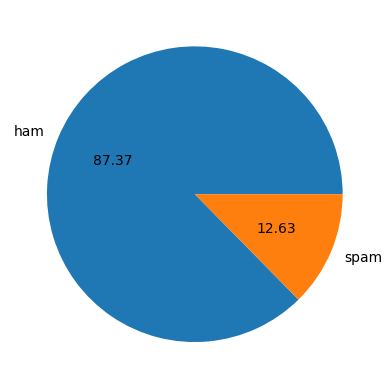

In [14]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct= '%0.2f')
plt.show()
# Observing the pie chart we can know that the dataframe is imbalanced.

In [15]:
# checking if the msgs are numm or not
df['num_characters']=df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
# number of words in each msg
# df['text'].apply(lambda x: len(x.split()))
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [17]:
# number of sentences in each msg
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [18]:
# visualizing the distribution 
df[['num_characters','num_words','num_sentences']].describe() 

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [19]:
# For ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [20]:
# For spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Plotting histographs


<AxesSubplot: xlabel='num_characters', ylabel='Count'>

<Figure size 1200x600 with 0 Axes>

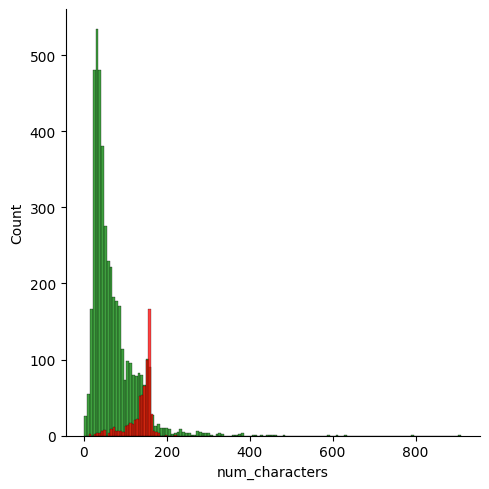

In [21]:
plt.figure(figsize=(12,6))
# visualizing the distribution of num_characters of ham sms
sns.displot(df[df['target']==0]['num_characters'],color='green',label='ham')
# visualizing the distribution of num_characters of spam sms
sns.histplot(df[df['target']==1]['num_characters'],color='red',label='spam')

<AxesSubplot: xlabel='num_words', ylabel='Count'>

<Figure size 1200x600 with 0 Axes>

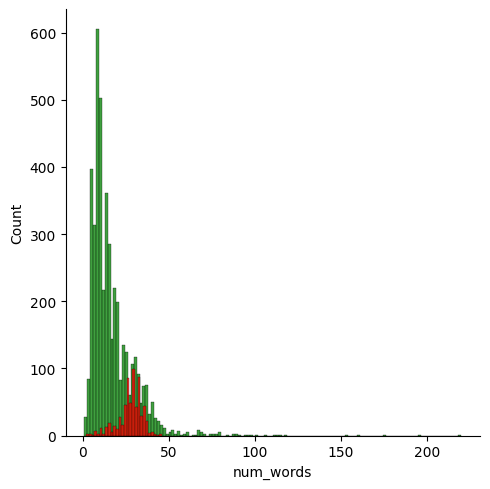

In [22]:
plt.figure(figsize=(12,6))
# visualizing the distribution of num_words of ham sms
sns.displot(df[df['target']==0]['num_words'],color='green',label='ham')
# visualizing the distribution of num_words of spam sms
sns.histplot(df[df['target']==1]['num_words'],color='red',label='spam')

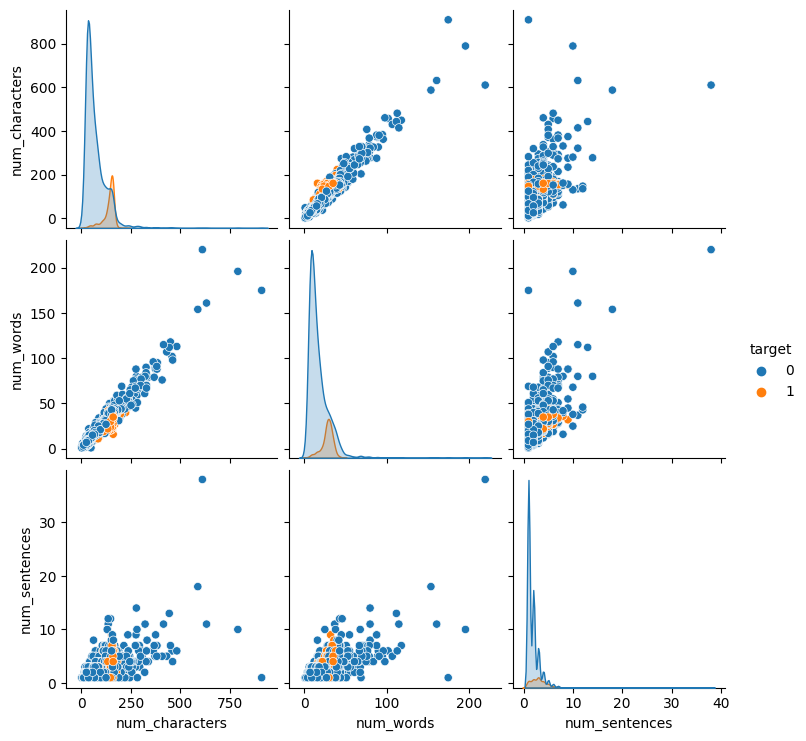

In [23]:
sns.pairplot(df,hue='target')

C:\Users\Sulav Bhandari\AppData\Local\Temp\ipykernel_19708\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

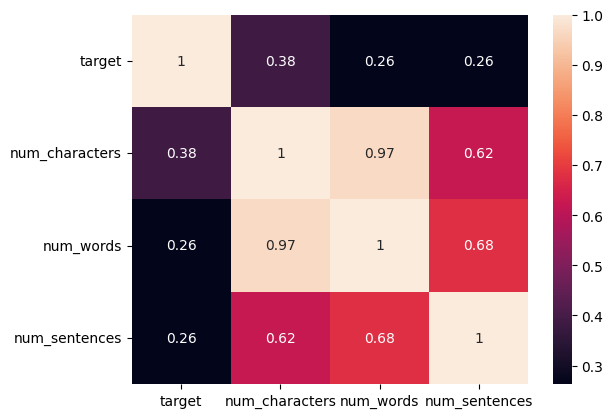

In [24]:
sns.heatmap(df.corr(),annot=True)

### Data Preprocessing

1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuaions
5. Stemming


In [25]:
# Accessing the text column
df['text'][2]

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [26]:
# Stop words
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Punctiations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
# Stemming(Converting to root word)
ps = PorterStemmer()
ps.stem('loving')

'love'

In [29]:
def transform_text(text):
    text=text.lower() # converting to lower case
    text = nltk.word_tokenize(text) # tokenizing
    text = [word for word in text if word.isalnum()] # removing special characters only ( isalpha() will remove all the special characters including numbers)
    # removing stopwords adn punctuations
    text = [word for word in text if word not in stopwords.words('english') and word not in string.punctuation]
    text = [PorterStemmer().stem(word) for word in text] # stemming
    # returning the text as a string
    return ' '.join(text)

In [30]:
# Just Checking the function
transform_text('Do you love me enough? I am hating you 3000!!!')
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [31]:
# applying the function to the dataframe as a new column
df['transformed_text']=df['text'].apply(transform_text)

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


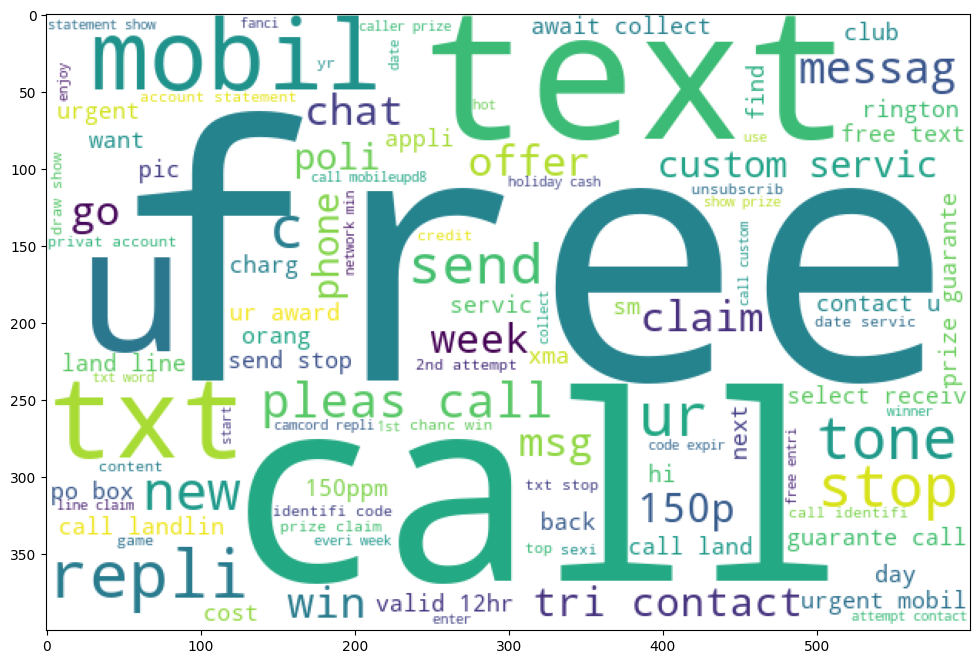

In [35]:
wc= WordCloud(width=600,height=400,background_color='white',max_words=100).generate(" ".join(df[df['target']==1]['transformed_text']))
plt.figure(figsize=(12,8))
plt.imshow(wc)